# Importing Libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [10]:
df = pd.read_csv('Used_car_data.csv')
df.head()

Name  \
0           Hyundai Creta SX PLUS AT 1.6 PETROL   
1  Renault Kwid 1.0 MARVEL IRON MAN EDITION AMT   
2                      Hyundai Eon ERA PLUS (O)   
3                              Maruti Swift VXI   
4                   Hyundai Creta SX 1.6 DIESEL   

                                  Model  Company  Year Fuel Type  KM Driven  \
0           Creta SX PLUS AT 1.6 PETROL  Hyundai  2017    PETROL      98493   
1  Kwid 1.0 MARVEL IRON MAN EDITION AMT  Renault  2018    PETROL      19178   
2                      Eon ERA PLUS (O)  Hyundai  2017    PETROL      33963   
3                             Swift VXI   Maruti  2012    PETROL      64557   
4                   Creta SX 1.6 DIESEL  Hyundai  2019    DIESEL      43987   

  Transmission Type  Price(in Lakh)   Location  
0         Automatic          973000  Bangalore  
1         Automatic          407000  Bangalore  
2            Manual          381000  Bangalore  
3            Manual          463000  Bangalore  
4            Manual         1150000  Bangalore

# Exploratory Data Analysis

In [12]:
df.shape

(2020, 9)

In [14]:
df.columns

Index(['Name', 'Model', 'Company', 'Year', 'Fuel Type', 'KM Driven',
       'Transmission Type', 'Price(in Lakh)', 'Location'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               2020 non-null   object
 1   Model              2020 non-null   object
 2   Company            2020 non-null   object
 3   Year               2020 non-null   int64 
 4   Fuel Type          2020 non-null   object
 5   KM Driven          2020 non-null   int64 
 6   Transmission Type  2020 non-null   object
 7   Price(in Lakh)     2020 non-null   int64 
 8   Location           2020 non-null   object
dtypes: int64(3), object(6)
memory usage: 142.2+ KB


In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

Name                 0
Model                0
Company              0
Year                 0
Fuel Type            0
KM Driven            0
Transmission Type    0
Price(in Lakh)       0
Location             0
dtype: int64

In [20]:
df.describe()

Year      KM Driven  Price(in Lakh)
count  2020.000000    2020.000000    2.020000e+03
mean   2017.724752   47236.418812    6.427431e+05
std       3.003792   27135.172888    3.073858e+05
min    2010.000000    1011.000000    1.440000e+05
25%    2016.000000   25748.750000    4.267500e+05
50%    2018.000000   43399.500000    5.760000e+05
75%    2020.000000   65590.000000    7.800000e+05
max    2024.000000  143991.000000    2.240000e+06

In [22]:
df.nunique()

Name                  586
Model                 586
Company                 7
Year                   15
Fuel Type               3
KM Driven            1997
Transmission Type       2
Price(in Lakh)        753
Location                4
dtype: int64

In [24]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Name', 'Model', 'Company', 'Fuel Type', 'Transmission Type',
       'Location'],
      dtype='object')

Numerical type columns:
Index(['Year', 'KM Driven', 'Price(in Lakh)'], dtype='object')


In [26]:
import pandas as pd

def classify_features(df):
    categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if column in ['Company', 'Fuel Type', 'Transmission Type', 'Location', 'Name', 'Model']:
            categorical_features.append(column)
        elif column in ['Year']:
            discrete_features.append(column)
        elif column in ['KM Driven', 'Price(in Lakh)']:
            continuous_features.append(column)

    return categorical_features, discrete_features, continuous_features

# Assuming 'df' is your DataFrame
categorical, discrete, continuous = classify_features(df)

print("Categorical Features:", categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)



Categorical Features: ['Name', 'Model', 'Company', 'Fuel Type', 'Transmission Type', 'Location']
Discrete Features: ['Year']
Continuous Features: ['KM Driven', 'Price(in Lakh)']


In [98]:
categorical= ['Model', 'Company', 'Fuel Type', 'Transmission Type', 'Location']

# Data Visualization

In [100]:
for feature in discrete:
    print(feature)
    print(sorted(df[feature].unique()))
    print()


Year
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]



# Univariate Analysis

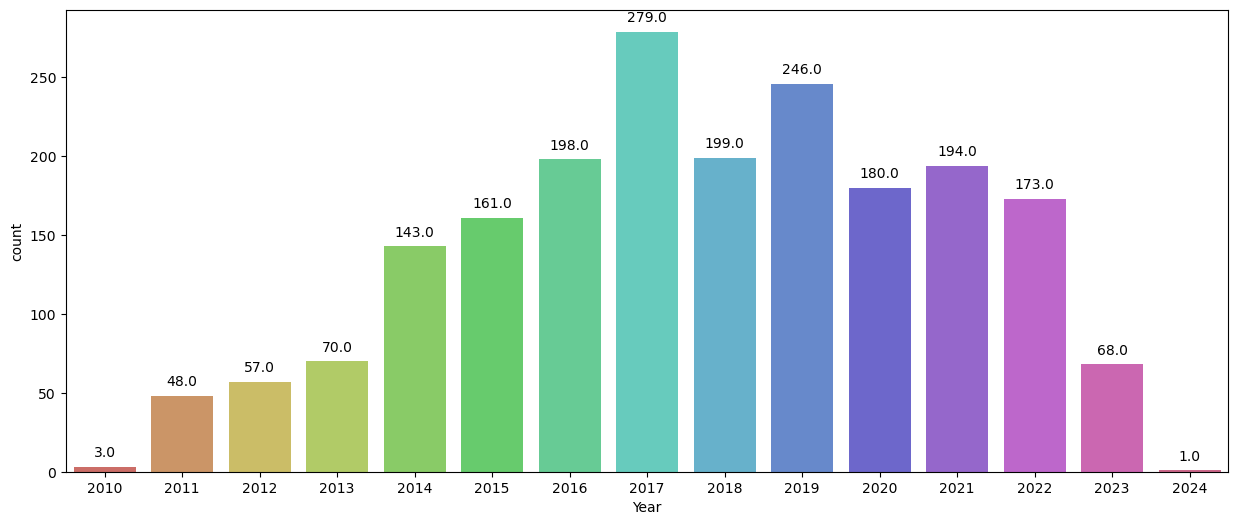

In [102]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

In [44]:
for feature in discrete:
    print(df[feature].value_counts().sort_index())
    print()


Year
2010      3
2011     48
2012     57
2013     70
2014    143
2015    161
2016    198
2017    279
2018    199
2019    246
2020    180
2021    194
2022    173
2023     68
2024      1
Name: count, dtype: int64



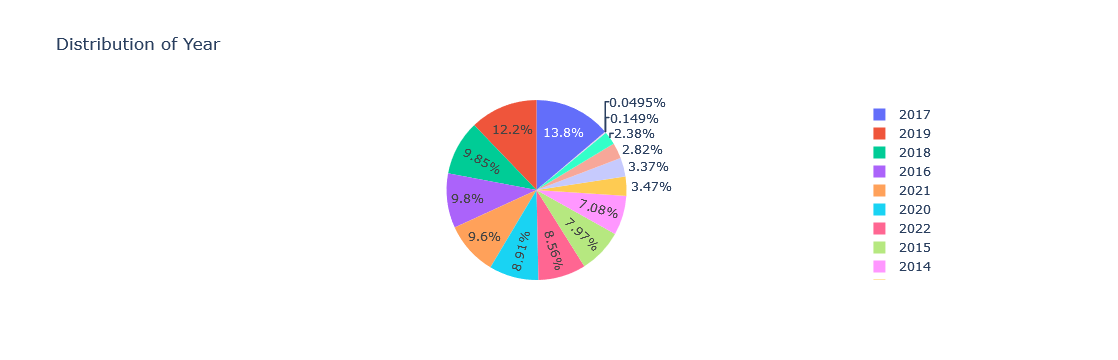

In [52]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [104]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Model
Model
Swift VXI                           43
Wagon R 1.0 VXI                     40
Baleno ZETA PETROL 1.2              30
Grand i10 SPORTZ 1.2 KAPPA VTVT     27
City 1.5L I-VTEC V MT               26
                                    ..
SELTOS GTX PLUS AT 1.5 DIESEL        1
Brio EX MT                           1
IGNIS ALPHA 1.2 AMT                  1
CARENS PRESTIGE 1.4 PETROL 7 STR     1
Eeco 5 STR WITH A/C+HTR CNG          1
Name: count, Length: 586, dtype: int64

Company
Company
Maruti      713
Hyundai     582
Honda       231
Tata        173
Renault     160
Mahindra     87
KIA          74
Name: count, dtype: int64

Fuel Type
Fuel Type
PETROL    1699
DIESEL     229
CNG         92
Name: count, dtype: int64

Transmission Type
Transmission Type
Manual       1430
Automatic     590
Name: count, dtype: int64

Location
Location
Bangalore    1107
Mumbai        530
New Delhi     279
Kolkata       104
Name: count, dtype: int64



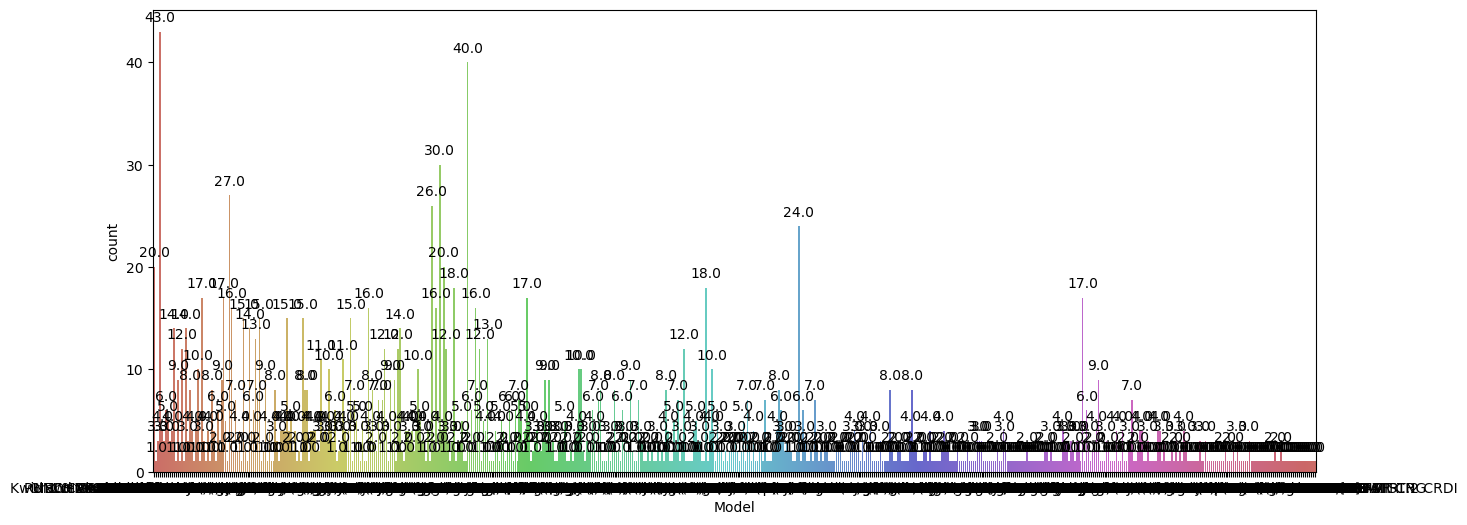

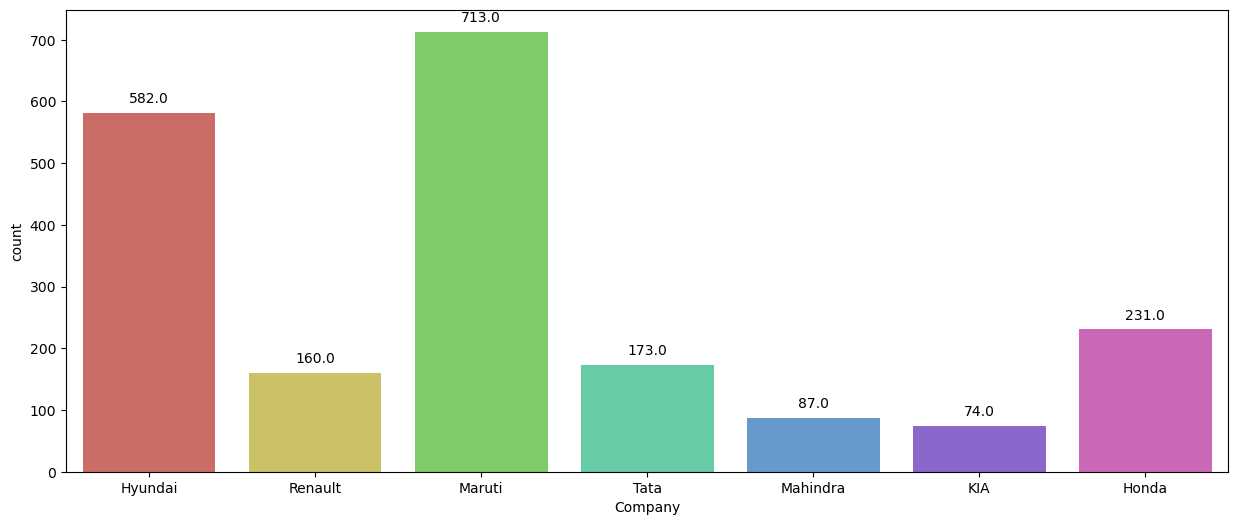

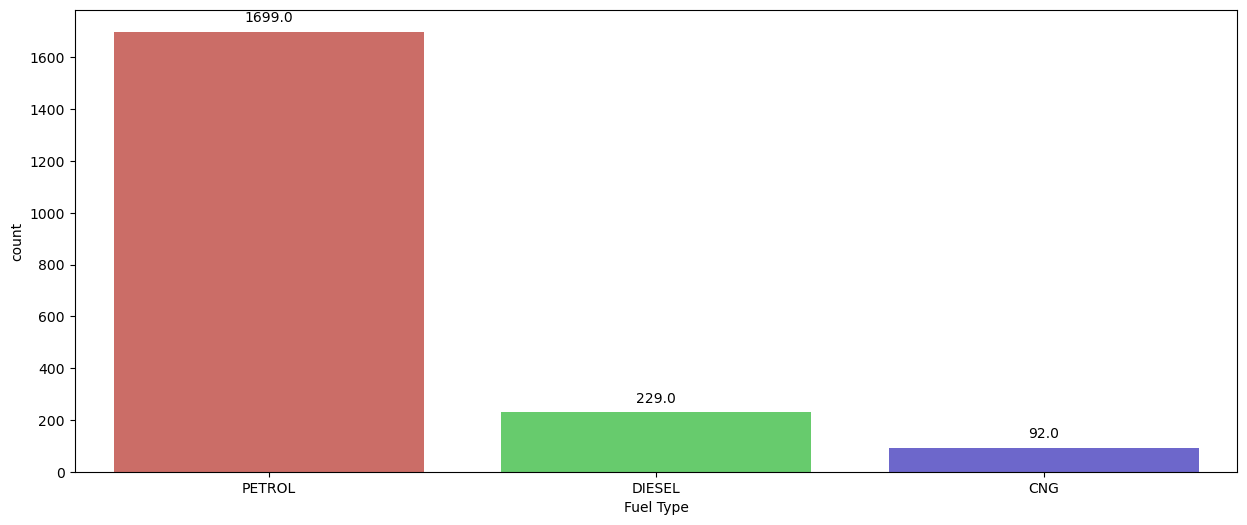

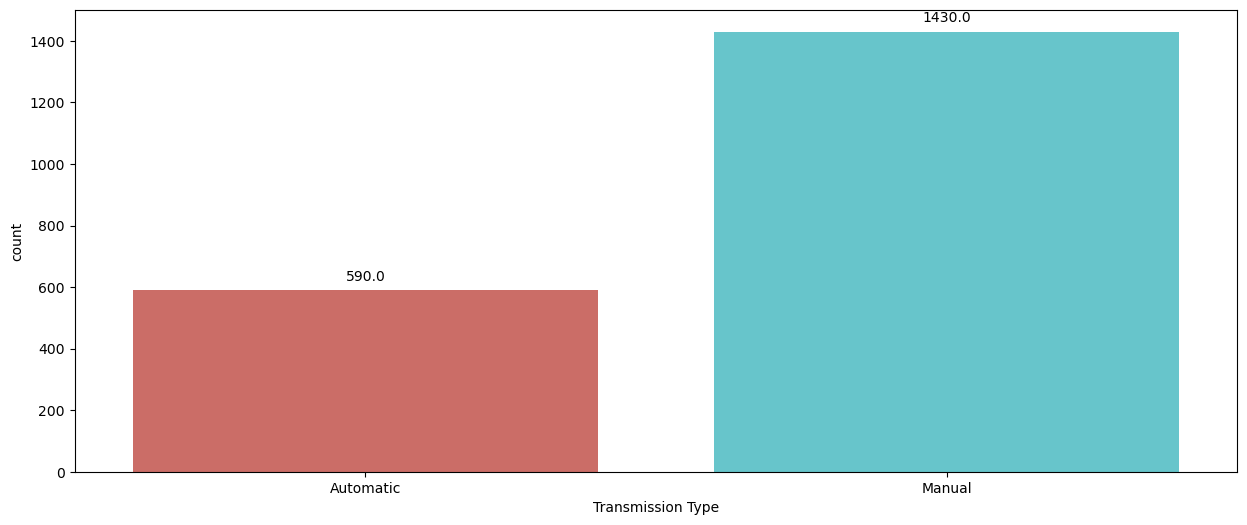

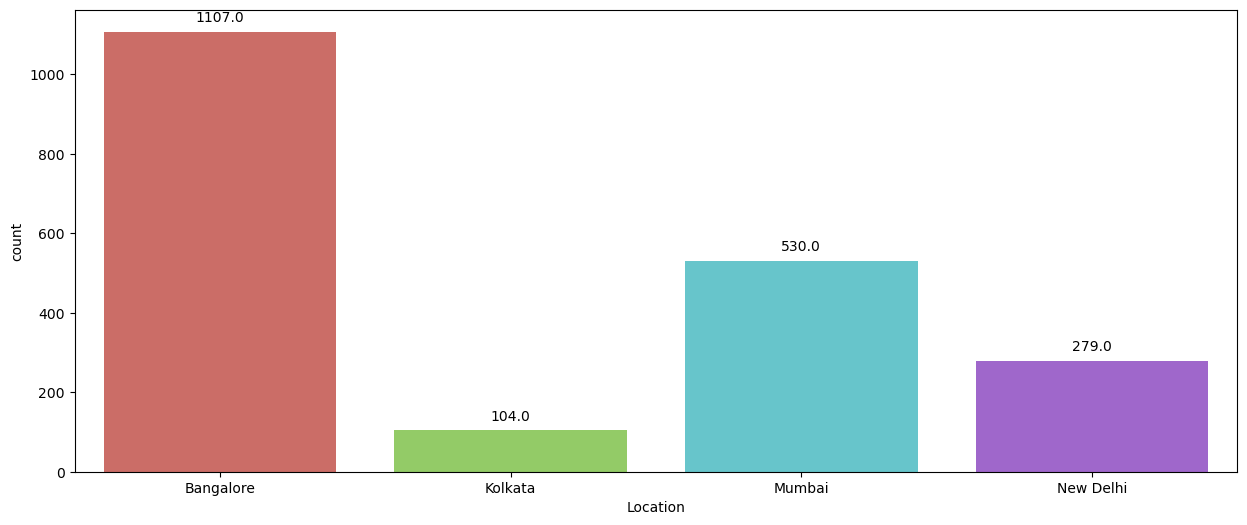

In [106]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

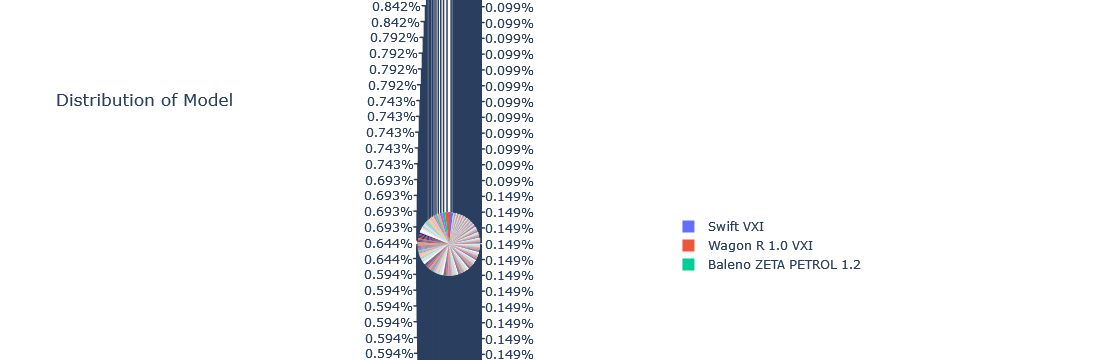

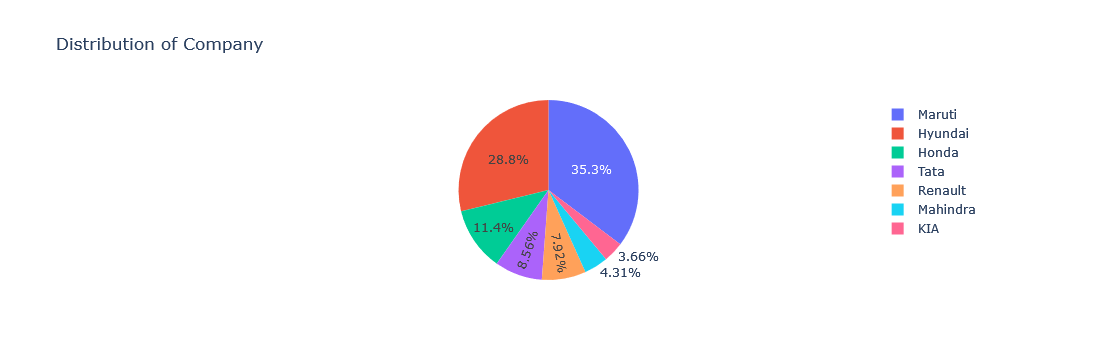

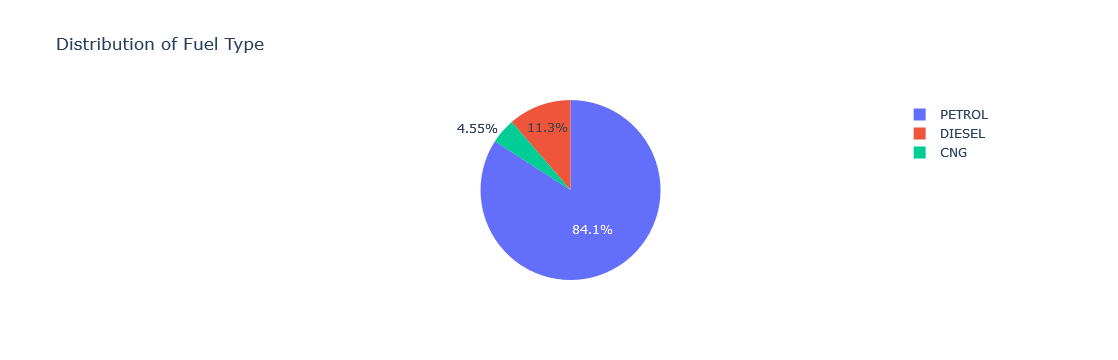

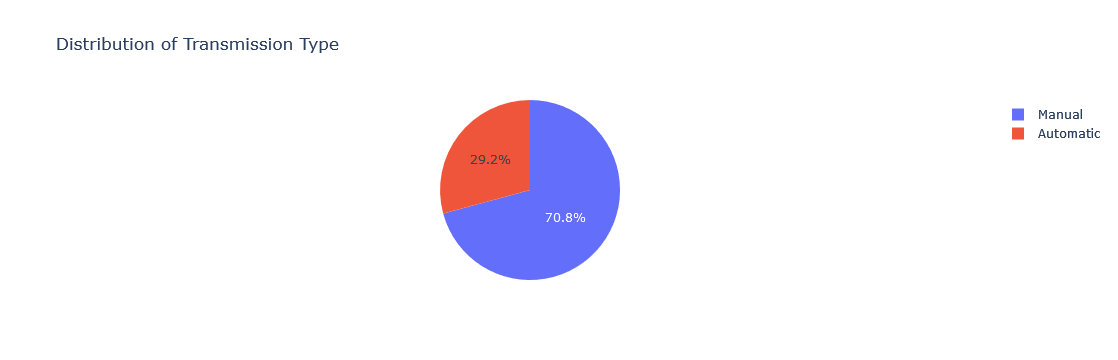

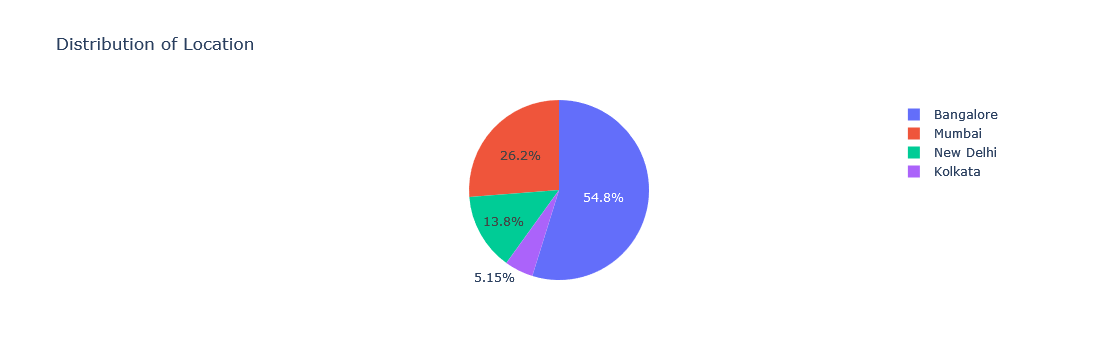

In [108]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

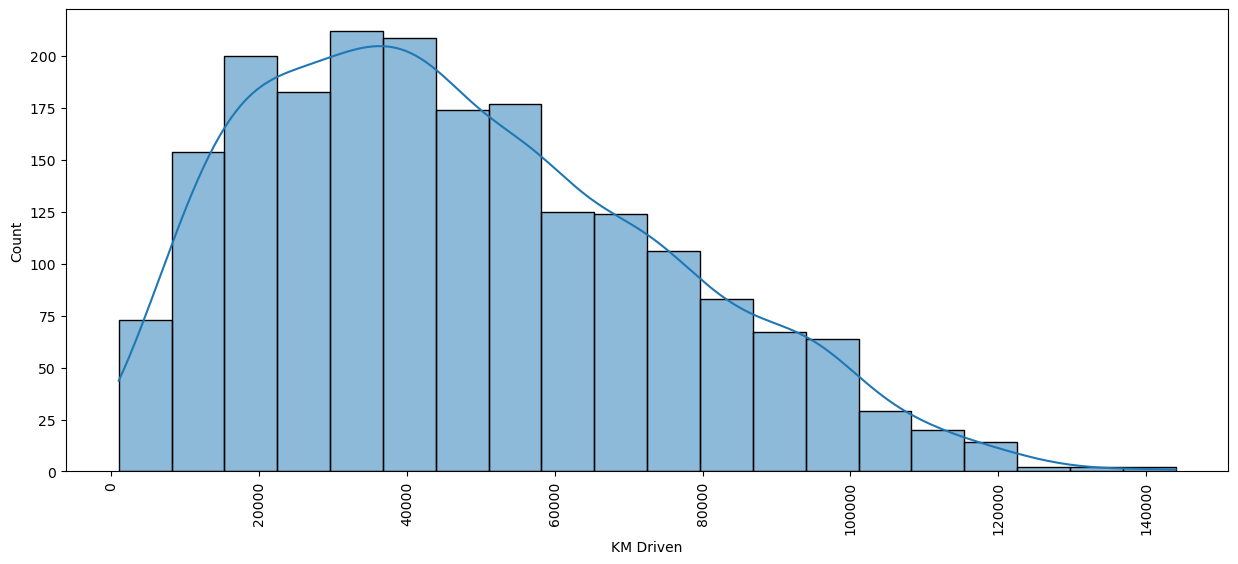

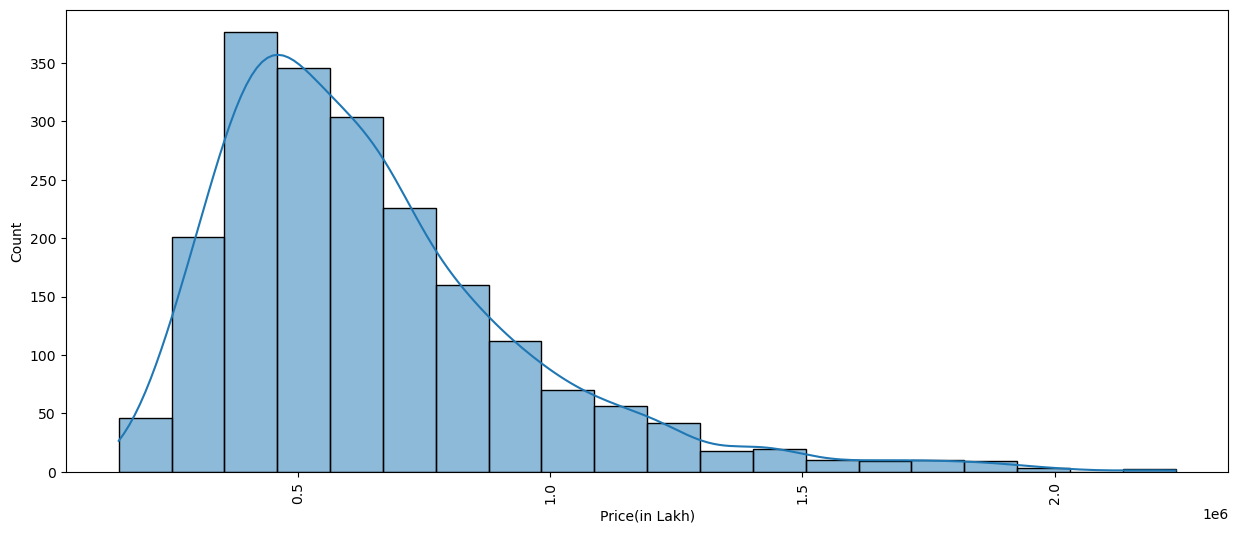

In [110]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

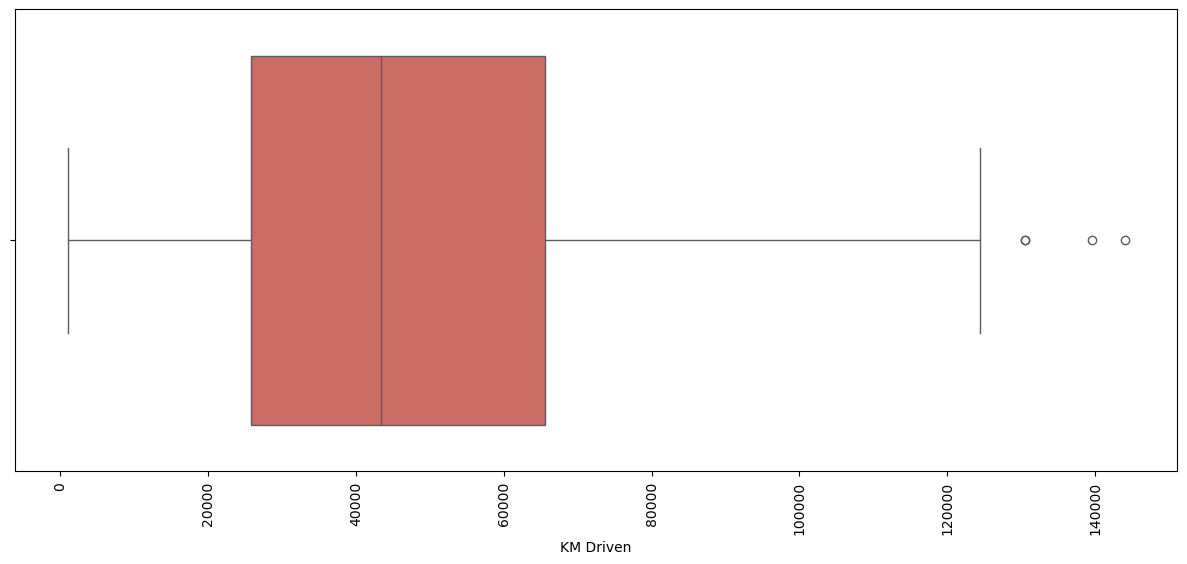

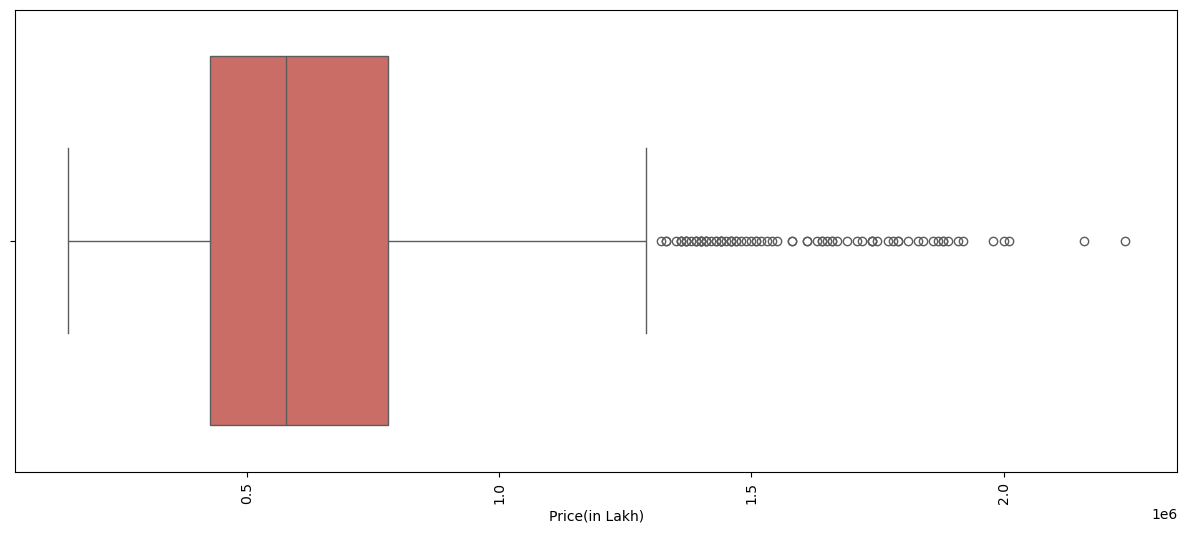

In [70]:
# OUTLIERS CHECK
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

# Bivariate Analysis

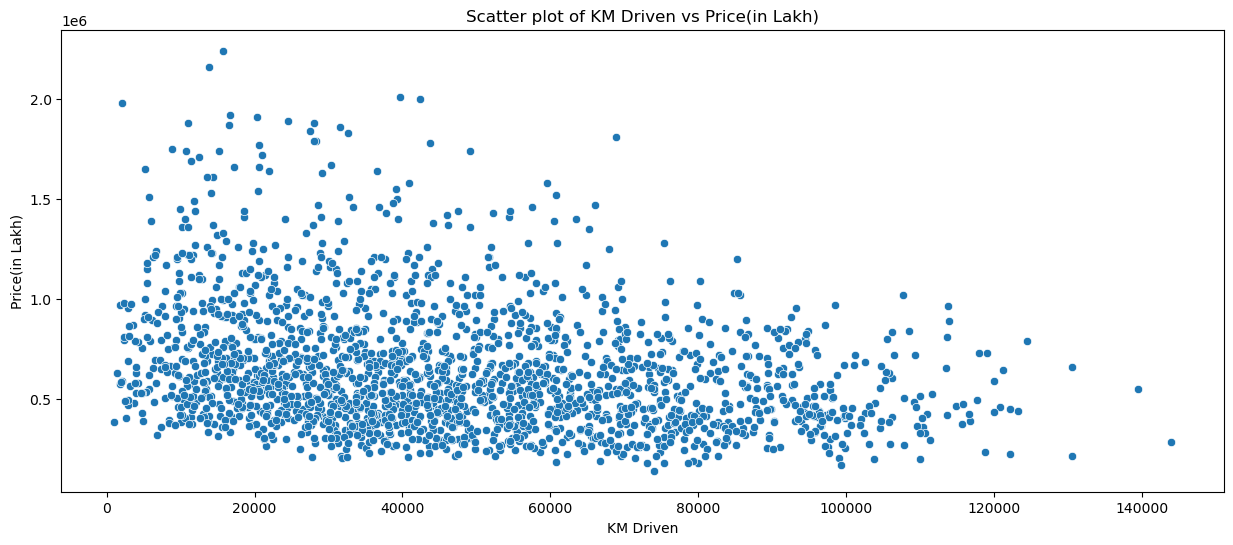

In [74]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

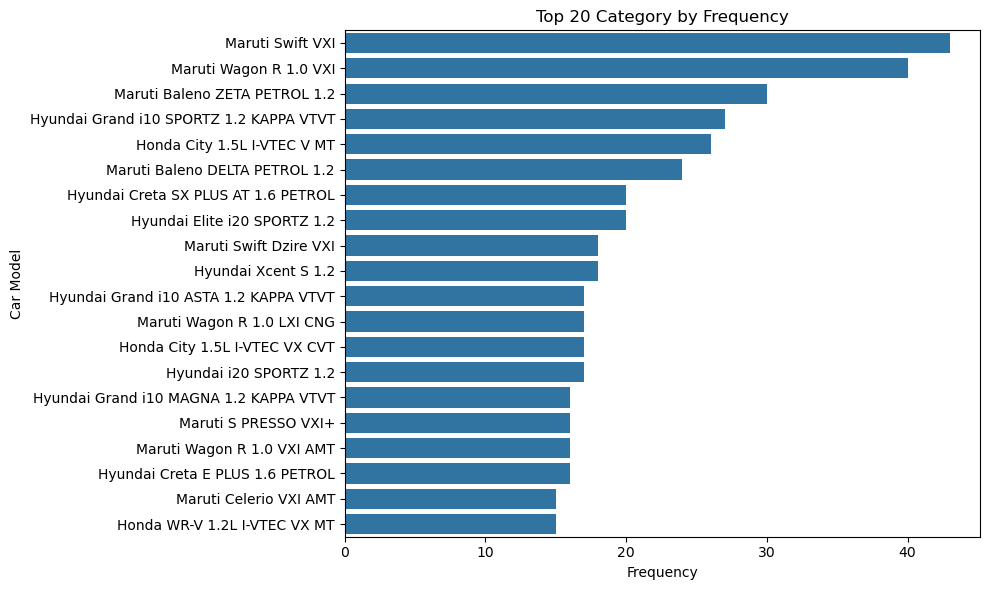

In [113]:
n = 20  
category_models = df['Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_models.values, y=category_models.index)
plt.title(f'Top {n} Category by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

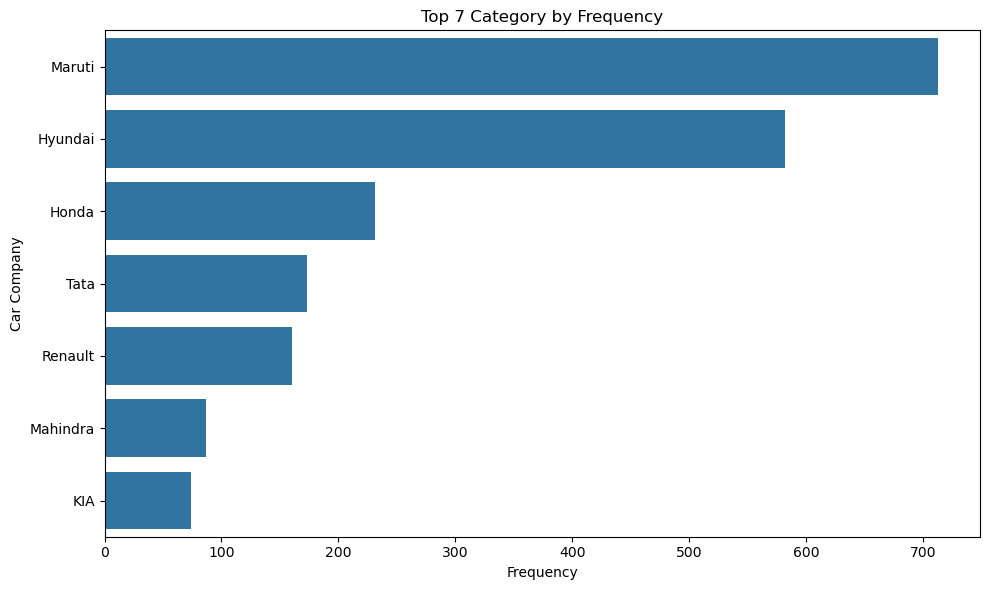

In [115]:
n = 7  
category_models = df['Company'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_models.values, y=category_models.index)
plt.title(f'Top {n} Category by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Company')
plt.tight_layout()
plt.show()

In [84]:
df.columns

Index(['Name', 'Model', 'Company', 'Year', 'Fuel Type', 'KM Driven',
       'Transmission Type', 'Price(in Lakh)', 'Location'],
      dtype='object')

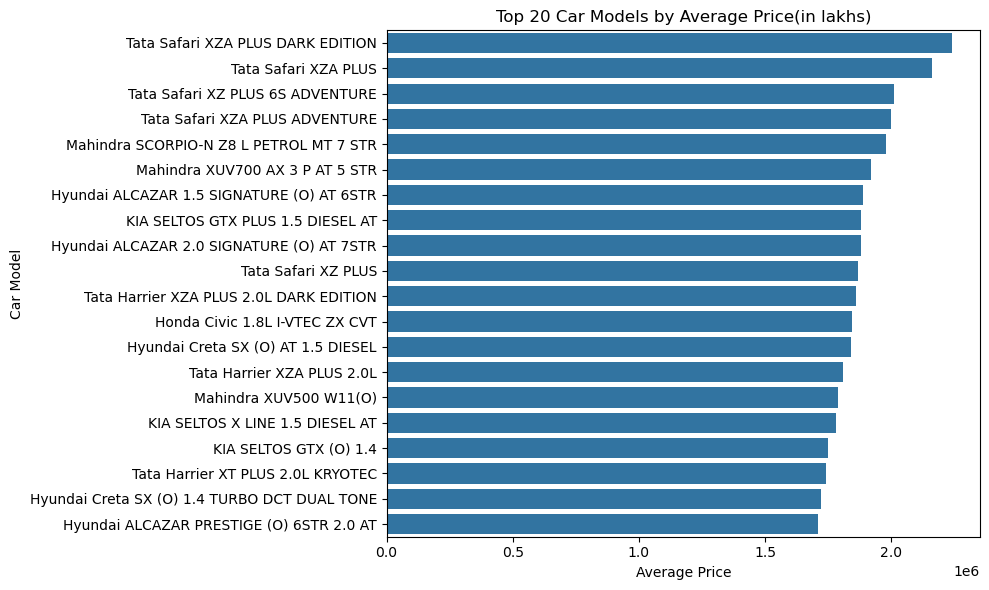

In [90]:
avg_prices_by_car = df.groupby('Name')['Price(in Lakh)'].mean().sort_values(ascending=False)

top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price(in lakhs)')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

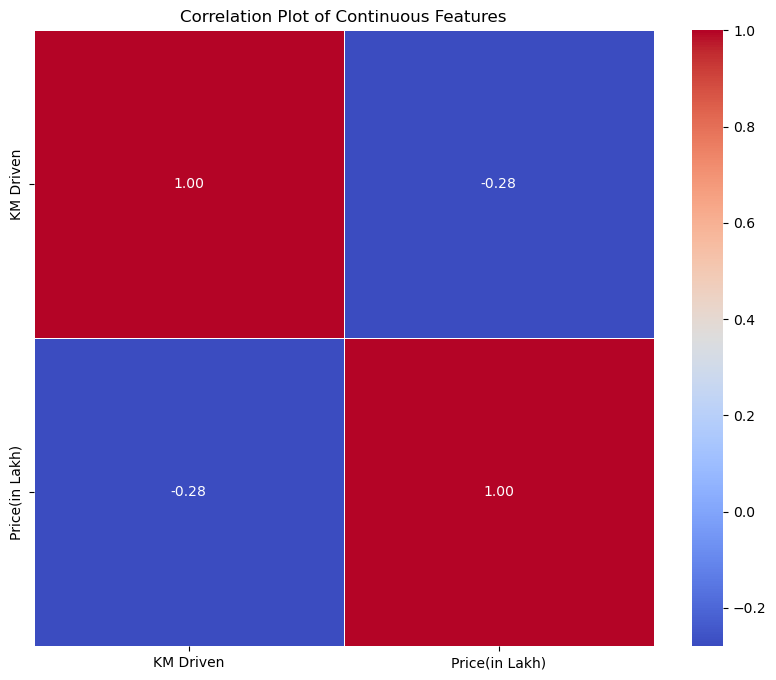

In [92]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()